# The following is an exploritory analysis of Washington State's Electric Vehical Population.

Answering the following questions:

1. What are the top 20 Makes
2. What are the top 20 Models
3. What is the frequency of full battery vs. Plugin hybirds?
4. What are the top 20 cities with EVs.
5. What are the top 20 counties with EVs.
6. What legislative districts have the most EV population.
7. What explore EV population density with machine learning.

The data was sourced from data.gov via the Washington State Department of Licensing

In [3]:
#-- Importing the nessesary libraries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#-- Importing the Dataset --#
df_raw = pd.read_csv('/Users/michaelsegaline/Desktop/Washington GOP/EV cars in Spokane /Electric_Vehicle_Population_Data_Washginton State.csv')

In [5]:
#-- Inspecting the head --#
df_raw.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [6]:
#-- Inspecting the siz of the dataset --#
df_raw.shape

(143596, 17)

In [ ]:
#-- Inspecting the unique column names --#
df_raw.columns

In [ ]:
#-- Getting descriptive statistics --#
df_raw.describe()

# Cleaning the grid points 

In [3]:
#-- Function to parse the POINT strings --#
def parse_point(point_str):
    if isinstance(point_str, str) and 'POINT (' in point_str:
        point_str = point_str.replace('POINT (', '').replace(')', '')
        parts = point_str.split()
        if len(parts) == 2:
            lon, lat = map(float, parts)
            return lon, lat
    return None, None

# Apply the function to create 'Longitude' and 'Latitude' columns
df_raw[['Longitude', 'Latitude']] = df_raw['Vehicle Location'].astype(str).apply(parse_point).apply(pd.Series)

# Print the first few rows to verify the results
print(df_raw[['Vehicle Location', 'Longitude', 'Latitude']].head())



                                 Vehicle Location   Longitude   Latitude
0   POINT (-122.38242499999996 47.77279000000004) -122.382425  47.772790
1   POINT (-120.37951169999997 46.55609000000004) -120.379512  46.556090
2  POINT (-122.37275999999997 47.689685000000054) -122.372760  47.689685
3  POINT (-122.15733999999998 47.487175000000036) -122.157340  47.487175
4                     POINT (-122.65223 47.57192) -122.652230  47.571920


In [ ]:
#-- Dropping null values --#
df_raw.dropna

In [4]:
#-- Renaming the cleaned dataset --#
df = df_raw

# Identifying the unique EVs Makes

In [5]:
df.Make.unique()

array(['BMW', 'FORD', 'CHEVROLET', 'TESLA', 'VOLVO', 'NISSAN', 'KIA',
       'AUDI', 'TOYOTA', 'RIVIAN', 'HONDA', 'PORSCHE', 'JEEP', 'CHRYSLER',
       'HYUNDAI', 'FIAT', 'VOLKSWAGEN', 'MITSUBISHI', 'MERCEDES-BENZ',
       'LUCID', 'MINI', 'GENESIS', 'MAZDA', 'TH!NK', 'CADILLAC', 'SUBARU',
       'LEXUS', 'LINCOLN', 'SMART', 'JAGUAR', 'POLESTAR', 'LAND ROVER',
       'FISKER', 'AZURE DYNAMICS', 'ALFA ROMEO', 'WHEEGO ELECTRIC CARS',
       'BENTLEY'], dtype=object)

# Identifying the to top 20 makes of electric cars

In [6]:
#-- Geting the top 20 most frequent values in the 'Make' column --#
top_20_make = df['Make'].value_counts().head(20)
top_20_make

TESLA            65552
NISSAN           13317
CHEVROLET        11816
FORD              7307
BMW               6209
KIA               5922
TOYOTA            5074
VOLKSWAGEN        3914
VOLVO             3415
JEEP              3084
AUDI              2900
HYUNDAI           2853
CHRYSLER          2483
RIVIAN            2209
PORSCHE            999
MERCEDES-BENZ      958
FIAT               817
HONDA              809
MITSUBISHI         797
MINI               772
Name: Make, dtype: int64

In [7]:
#-- Geting the top 20 most frequent values in the 'Model' column --#
top_20_make = df['Model'].value_counts().head(20)
top_20_make

MODEL 3           26766
MODEL Y           26194
LEAF              13093
MODEL S            7542
BOLT EV            5599
MODEL X            5002
VOLT               4884
ID.4               2839
NIRO               2764
PRIUS PRIME        2506
PACIFICA           2483
WRANGLER           2472
MUSTANG MACH-E     2431
X5                 1999
I3                 1906
FUSION             1836
EV6                1561
C-MAX              1537
IONIQ 5            1464
RAV4 PRIME         1451
Name: Model, dtype: int64

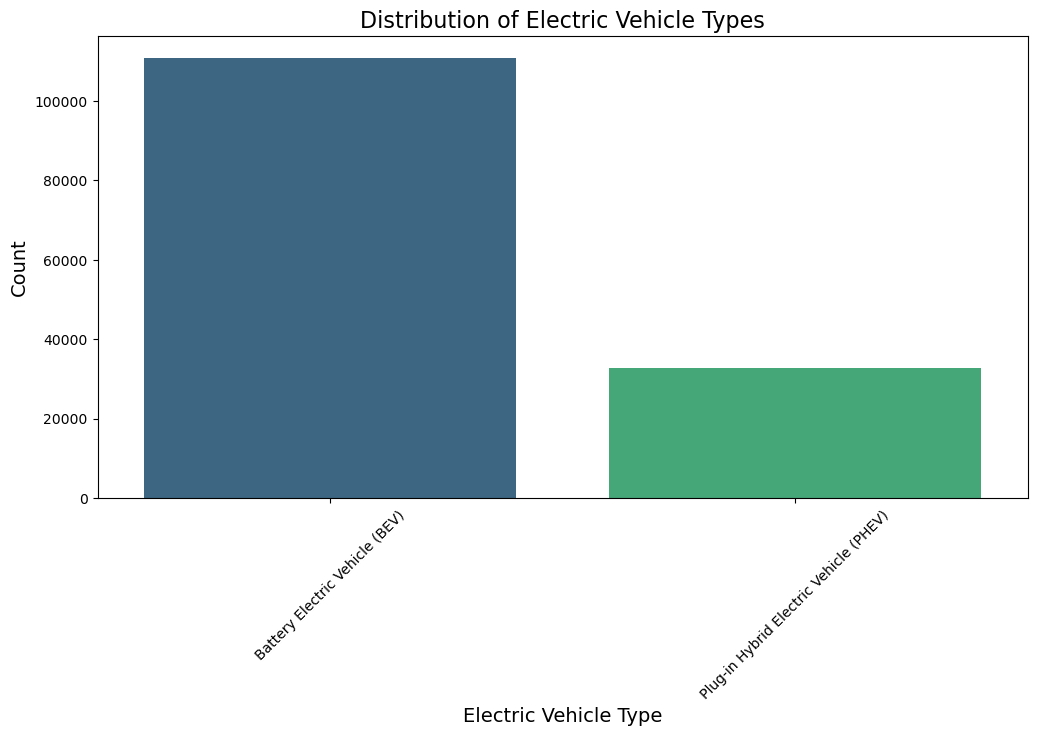

In [8]:
# Count the occurrences of each electric vehicle type
ev_type_counts = df['Electric Vehicle Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, palette='viridis')

# Add titles and labels
plt.title('Distribution of Electric Vehicle Types', fontsize=16)
plt.xlabel('Electric Vehicle Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [9]:
df['Legislative District'].unique()

array([36., 15., 41., 26., 48., 22., 14., 45., 46., 35., 23., 43., 32.,
       44., 21.,  1., 30., 38.,  2., 11., 39., 13., 33., 37., 34., 47.,
       40., 10.,  7., 16., 12.,  9.,  6., nan, 17., 18., 19., 24., 20.,
       49.,  5.,  8., 31., 28., 25., 27.,  4.,  3., 29., 42.])

In [10]:
#-- Geting the top 20 most legislative districts  --#
top_20_dis = df['Legislative District'].value_counts().head(20)
top_20_dis

41.0    9553
45.0    8807
48.0    8045
36.0    6270
1.0     6209
5.0     6044
46.0    5727
43.0    5553
11.0    5423
37.0    4318
34.0    4242
18.0    3838
44.0    3582
22.0    3485
21.0    3476
32.0    3431
40.0    3242
23.0    3185
26.0    2865
33.0    2801
Name: Legislative District, dtype: int64

# Identifying the top 20 cities with EVs

In [11]:
#-- Geting the top 20 cities  --#
top_20_cty = df['City'].value_counts().head(20)
top_20_cty

Seattle          24662
Bellevue          7376
Redmond           5245
Vancouver         5045
Bothell           4599
Kirkland          4455
Sammamish         4199
Renton            3744
Olympia           3396
Tacoma            2975
Bellingham        2436
Issaquah          2243
Spokane           2121
Kent              2100
Lynnwood          2056
Mercer Island     2011
Tukwila           2002
Woodinville       1956
Everett           1939
Snohomish         1669
Name: City, dtype: int64

# Identifying the top 20 counties with EVs

In [12]:
#-- Geting the top 20 cities  --#
top_20_cty = df['County'].value_counts().head(20)
top_20_cty

King            75383
Snohomish       16429
Pierce          11017
Clark            8455
Thurston         5097
Kitsap           4725
Spokane          3542
Whatcom          3529
Benton           1757
Skagit           1599
Island           1593
Clallam           883
Jefferson         850
Chelan            844
San Juan          821
Yakima            782
Cowlitz           717
Mason             688
Lewis             554
Grays Harbor      513
Name: County, dtype: int64

In [14]:
# Calculate the count of vehicles per county
county_counts = df['County'].value_counts()



In [16]:
# Calculate the percentage of the total vehicle population for each county
county_percentages = (county_counts / county_counts.sum()) * 100

# Get the top 20 counties by vehicle population percentage
county_percentages.head(20)

King            52.504632
Snohomish       11.442880
Pierce           7.673395
Clark            5.888949
Thurston         3.550086
Kitsap           3.290986
Spokane          2.467020
Whatcom          2.457966
Benton           1.223759
Skagit           1.113711
Island           1.109532
Clallam          0.615014
Jefferson        0.592029
Chelan           0.587850
San Juan         0.571831
Yakima           0.544667
Cowlitz          0.499394
Mason            0.479195
Lewis            0.385864
Grays Harbor     0.357307
Name: County, dtype: float64

In [17]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Longitude', 'Latitude'],
      dtype='object')

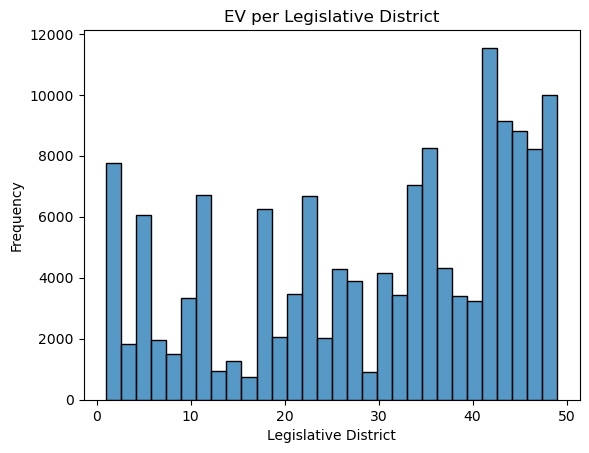

In [23]:
# Plot a histogram of the 'Legislative District' column
sns.histplot(df['Legislative District'], bins=30, kde=False)

# Set the title and labels
plt.title('EV per Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Now running KMeans on the lat long

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [26]:
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

In [27]:
scaler = StandardScaler()
coords = df[['Longitude', 'Latitude']]
coords_scaled = scaler.fit_transform(coords)

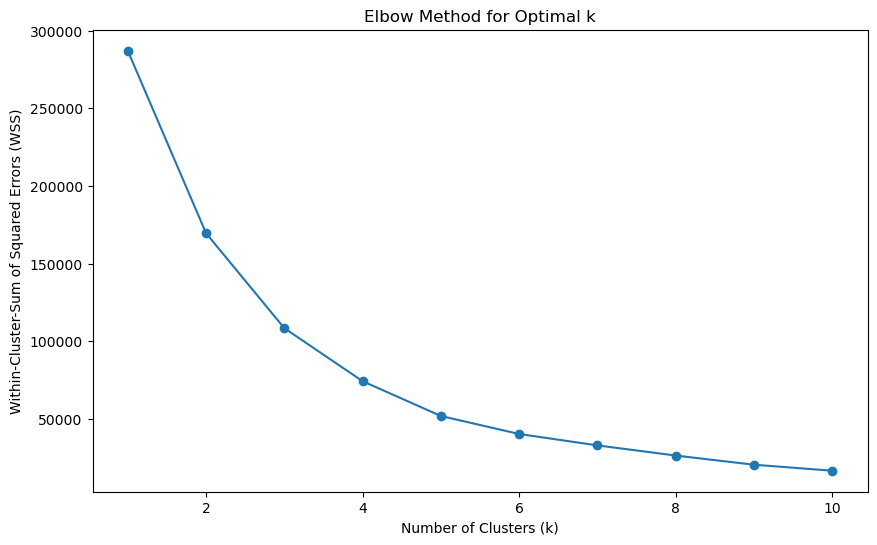

In [28]:
# Compute Within-Cluster-Sum of Squared Errors (WSS) for different k values
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords_scaled)
    wss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=23, random_state=42)
df['Cluster'] = kmeans.fit_predict(coords_scaled)


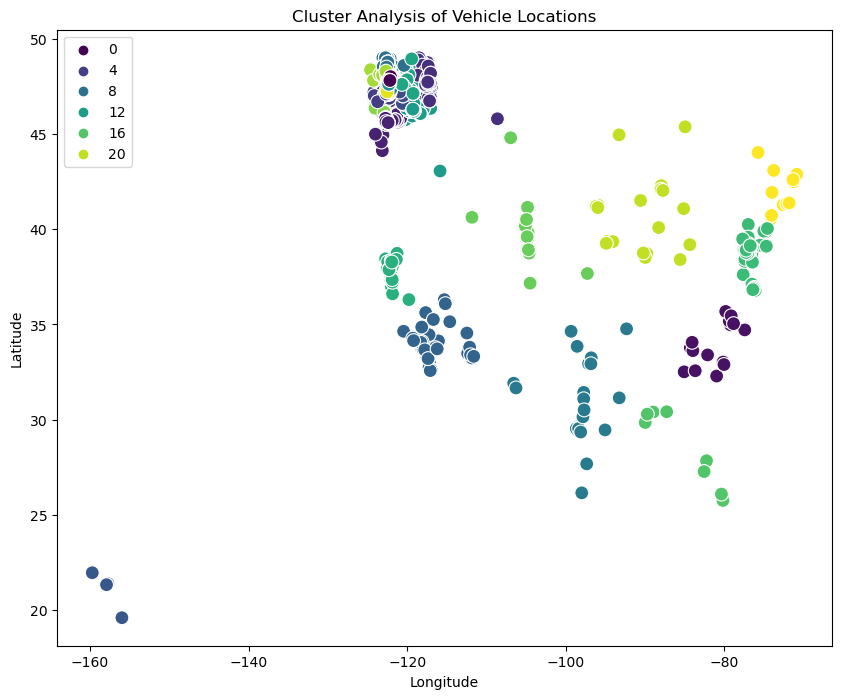

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Cluster Analysis of Vehicle Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [33]:
df.to_csv('/Users/michaelsegaline/Desktop/Washington GOP/EV cars in Spokane /evcar in WA lat long.csv',index = False)